In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle
import numpy as np

In [2]:
plt.style.use('dark_background')

In [3]:
mammo = pd.read_table('scan_file_data.txt', delimiter='\s', engine='python')

In [4]:
mammo.columns = mammo.columns.str.lower()

In [37]:
mammo.head()

,refnum,bg,class,severity,x,y,radius
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,None,None,None,NaN
3,mdb004,D,NORM,None,None,None,NaN
4,mdb005,F,CIRC,B,477,133,30.0


In [6]:
mammo['class'].value_counts(normalize=True)

NORM    0.627273
CALC    0.090909
CIRC    0.075758
ARCH    0.057576
SPIC    0.057576
ASYM    0.045455
MISC    0.045455
Name: class, dtype: float64

In [7]:
mammo.severity.value_counts(normalize=True)

B    0.560976
M    0.439024
Name: severity, dtype: float64

In [8]:
mammo.isna().sum()['x':'radius']

x         208
y         208
radius    211
dtype: int64

In [9]:
mammo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   refnum    330 non-null    object 
 1   bg        330 non-null    object 
 2   class     330 non-null    object 
 3   severity  123 non-null    object 
 4   x         122 non-null    object 
 5   y         122 non-null    object 
 6   radius    119 non-null    float64
dtypes: float64(1), object(6)
memory usage: 18.2+ KB


535 425 197.0


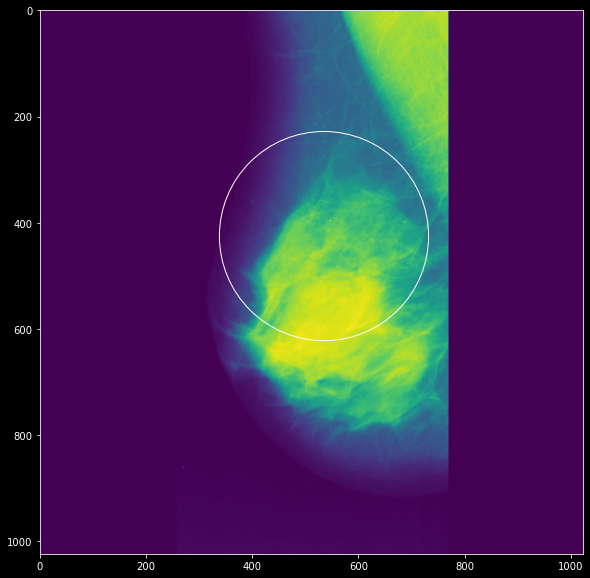

In [13]:
img = mpimg.imread('./all-mias/mdb001.pgm')

# Create a figure. Equal aspect so circles look circular
fig, ax = plt.subplots(1)

fig.set_size_inches(12, 10)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# create a circle to patch on the image
x = pd.to_numeric(mammo.iloc[0].x)
y = pd.to_numeric(mammo.iloc[0].y)
r = pd.to_numeric(mammo.iloc[0].radius)
circ = Circle((x,y), r, fill=False)
ax.add_patch(circ)
print(x, y, r)
# Show the image
plt.show()

477 133 30.0


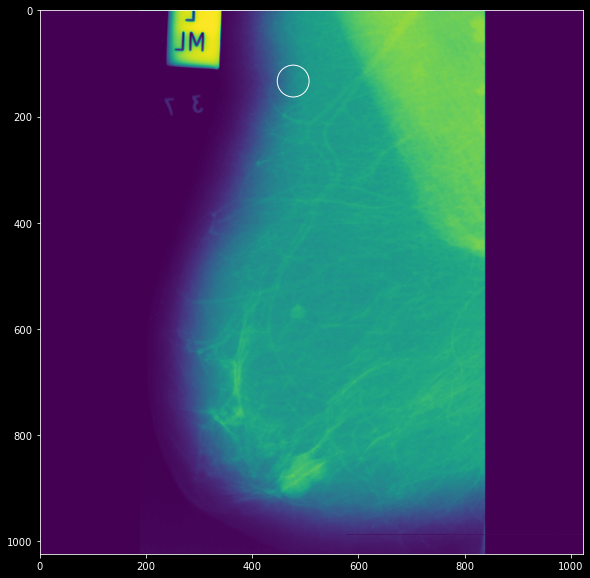

In [11]:
img = mpimg.imread('./all-mias/mdb005.pgm')

# Create a figure. Equal aspect so circles look circular
fig, ax = plt.subplots(1)

fig.set_size_inches(12, 10)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

# create a circle to patch on the image
x = pd.to_numeric(mammo.iloc[4].x)
y = pd.to_numeric(mammo.iloc[4].y)
r = pd.to_numeric(mammo.iloc[4].radius)
circ = Circle((x,y), r, fill=False)
ax.add_patch(circ)
print(x, y, r)
# Show the image
plt.show()

In [28]:
from pathlib import Path
import re

In [36]:
test_df = mammo.copy()

In [38]:
test_df.set_index(keys='refnum', drop=True, inplace=True)

In [39]:
test_df

,bg,class,severity,x,y,radius
refnum,,,,,,
mdb001,G,CIRC,B,535,425,197.0
mdb002,G,CIRC,B,522,280,69.0
mdb003,D,NORM,None,None,None,NaN
mdb004,D,NORM,None,None,None,NaN
mdb005,F,CIRC,B,477,133,30.0
...,...,...,...,...,...,...
mdb318,D,NORM,None,None,None,NaN
mdb319,D,NORM,None,None,None,NaN
mdb320,D,NORM,None,None,None,NaN


In [105]:
def create_img_dic(path: str) -> dict:
    '''Creates a dictionary with image filenames'''
    paths = Path(path).glob('**/*.pgm')
    img_dic = dict()
    for f_path in sorted(paths):
        # get full filename
        full_fname = f_path.name
        # get filename (no extension)
        filename = f_path.stem
        # create dictionary
        img_dic[filename] = f_path.as_posix()
    
    return img_dic

In [ ]:
scans_dictionary = create_img_dic('./all-mias/')
scans_dictionary

In [61]:
def get_img_data(img: str) -> pd.Series:
    try:
        img_data = test_df.loc[img]
        print(img_data)
    except KeyError as ie:
        print('Invalid Index')

In [62]:
get_img_data('mdb001')

bg              G
class        CIRC
severity        B
x             535
y             425
radius      197.0
Name: mdb001, dtype: object


In [88]:
from PIL import Image

In [107]:
test_img = Image.open('./all-mias/mdb001.pgm')